In [1]:
 import numpy as np #numpy library
import pandas as pd #pandas library
import matplotlib.pyplot as plt #pyplot
import seaborn as sns #seaborn
import plotly.express as px #for visualization
import statsmodels.api as sm #for logistic regression

In [3]:
 df = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/CarPrice.csv")
df


car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible        rwd          front       88.6  ...   
1          two  convertible        rwd          front       88.6  ...   
2          two    hatchback        rwd          front       94.5  ...   
3         four        sedan        fwd          front       99.8  ...   
4         four        sedan        4wd          front       99.4  ...   
..         ...          ...        ...            ...        ...  ...   
200       four        sedan        rwd          front      109.1  ...   
201       four        sedan        rwd          front      109.1  ...   
202       four        sedan        rwd          front      109.1  ...   
203       four        sedan        rwd          front      109.1  ...   
204       four        sedan        rwd          front      109.1  ...   

     enginesize  fuelsystem  boreratio  stroke compressionratio horsepower  \
0           130        mpfi       3.47    2.68              9.0        111   
1           130        mpfi       3.47    2.68              9.0        111   
2           152        mpfi       2.68    3.47              9.0        154   
3           109        mpfi       3.19    3.40             10.0        102   
4           136        mpfi       3.19    3.40              8.0        115   
..          ...         ...        ...     ...              ...        ...   
200         141        mpfi       3.78    3.15              9.5        114   
201         141        mpfi       3.78    3.15              8.7        160   
202         173        mpfi       3.58    2.87              8.8        134   
203         145         idi       3.01    3.40             23.0        106   
204         141        mpfi       3.78    3.15              9.5        114   

     peakrpm citympg  highwaympg    price  
0       5000      21          27  13495.0  
1       5000      21          27  16500.0  
2       5000      19          26  16500.0  
3       5500      24          30  13950.0  
4       5500      18          22  17450.0  
..       ...     ...         ...      ...  
200     5400      23          28  16845.0  
201     5300      19          25  19045.0  
202     5500      18          23  21485.0  
203     4800      26          27  22470.0  
204     5400      19          25  22625.0  

[205 rows x 26 columns]

In [4]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [5]:
df.shape()

TypeError: ignored

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
df.describe()

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

In [9]:
 from sklearn.preprocessing import LabelEncoder
Numerics=LabelEncoder()
df['CarName']=Numerics.fit_transform(df['CarName'])
df['fueltype']=Numerics.fit_transform(df['fueltype'])
df['aspiration']=Numerics.fit_transform(df['aspiration'])
df['doornumber']=Numerics.fit_transform(df['doornumber'])
df['carbody']=Numerics.fit_transform(df['carbody'])
df['drivewheel']=Numerics.fit_transform(df['drivewheel'])
df['enginelocation']=Numerics.fit_transform(df['enginelocation'])
df['fuelsystem']=Numerics.fit_transform(df['fuelsystem'])
df['enginetype']=Numerics.fit_transform(df['enginetype'])
df['cylindernumber']=Numerics.fit_transform(df['cylindernumber'])
print("ok")
print(df)



ok
     car_ID  symboling  CarName  fueltype  aspiration  doornumber  carbody  \
0         1          3        2         1           0           1        0   
1         2          3        3         1           0           1        0   
2         3          1        1         1           0           1        2   
3         4          2        4         1           0           0        3   
4         5          2        5         1           0           0        3   
..      ...        ...      ...       ...         ...         ...      ...   
200     201         -1      139         1           0           0        3   
201     202         -1      138         1           1           0        3   
202     203         -1      140         1           0           0        3   
203     204         -1      142         0           1           0        3   
204     205         -1      143         1           1           0        3   

     drivewheel  enginelocation  wheelbase  ...  enginesize 

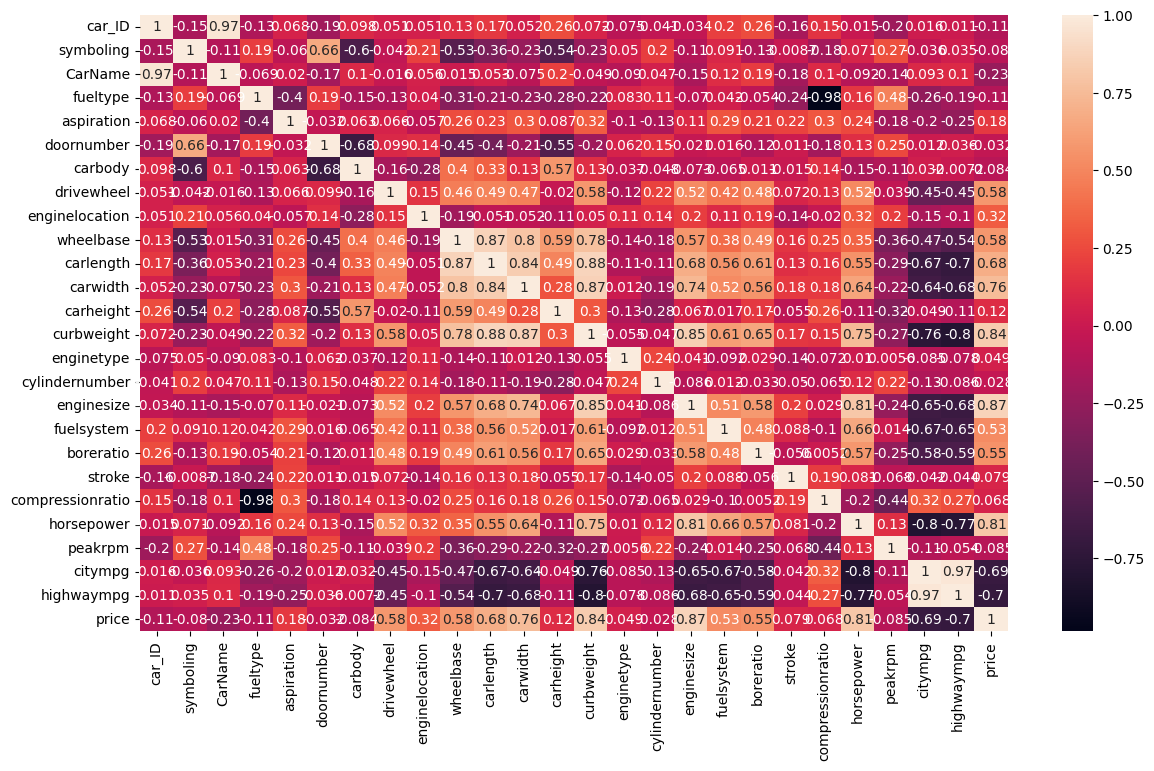

In [11]:
import seaborn
correlation = df.corr ()
fig=plt.figure(figsize=(14,8))
seaborn.heatmap(correlation,annot=True)
plt.show()


In [12]:
 correlation = df.corr ()
correlation.style.background_gradient (cmap = 'BrBG')

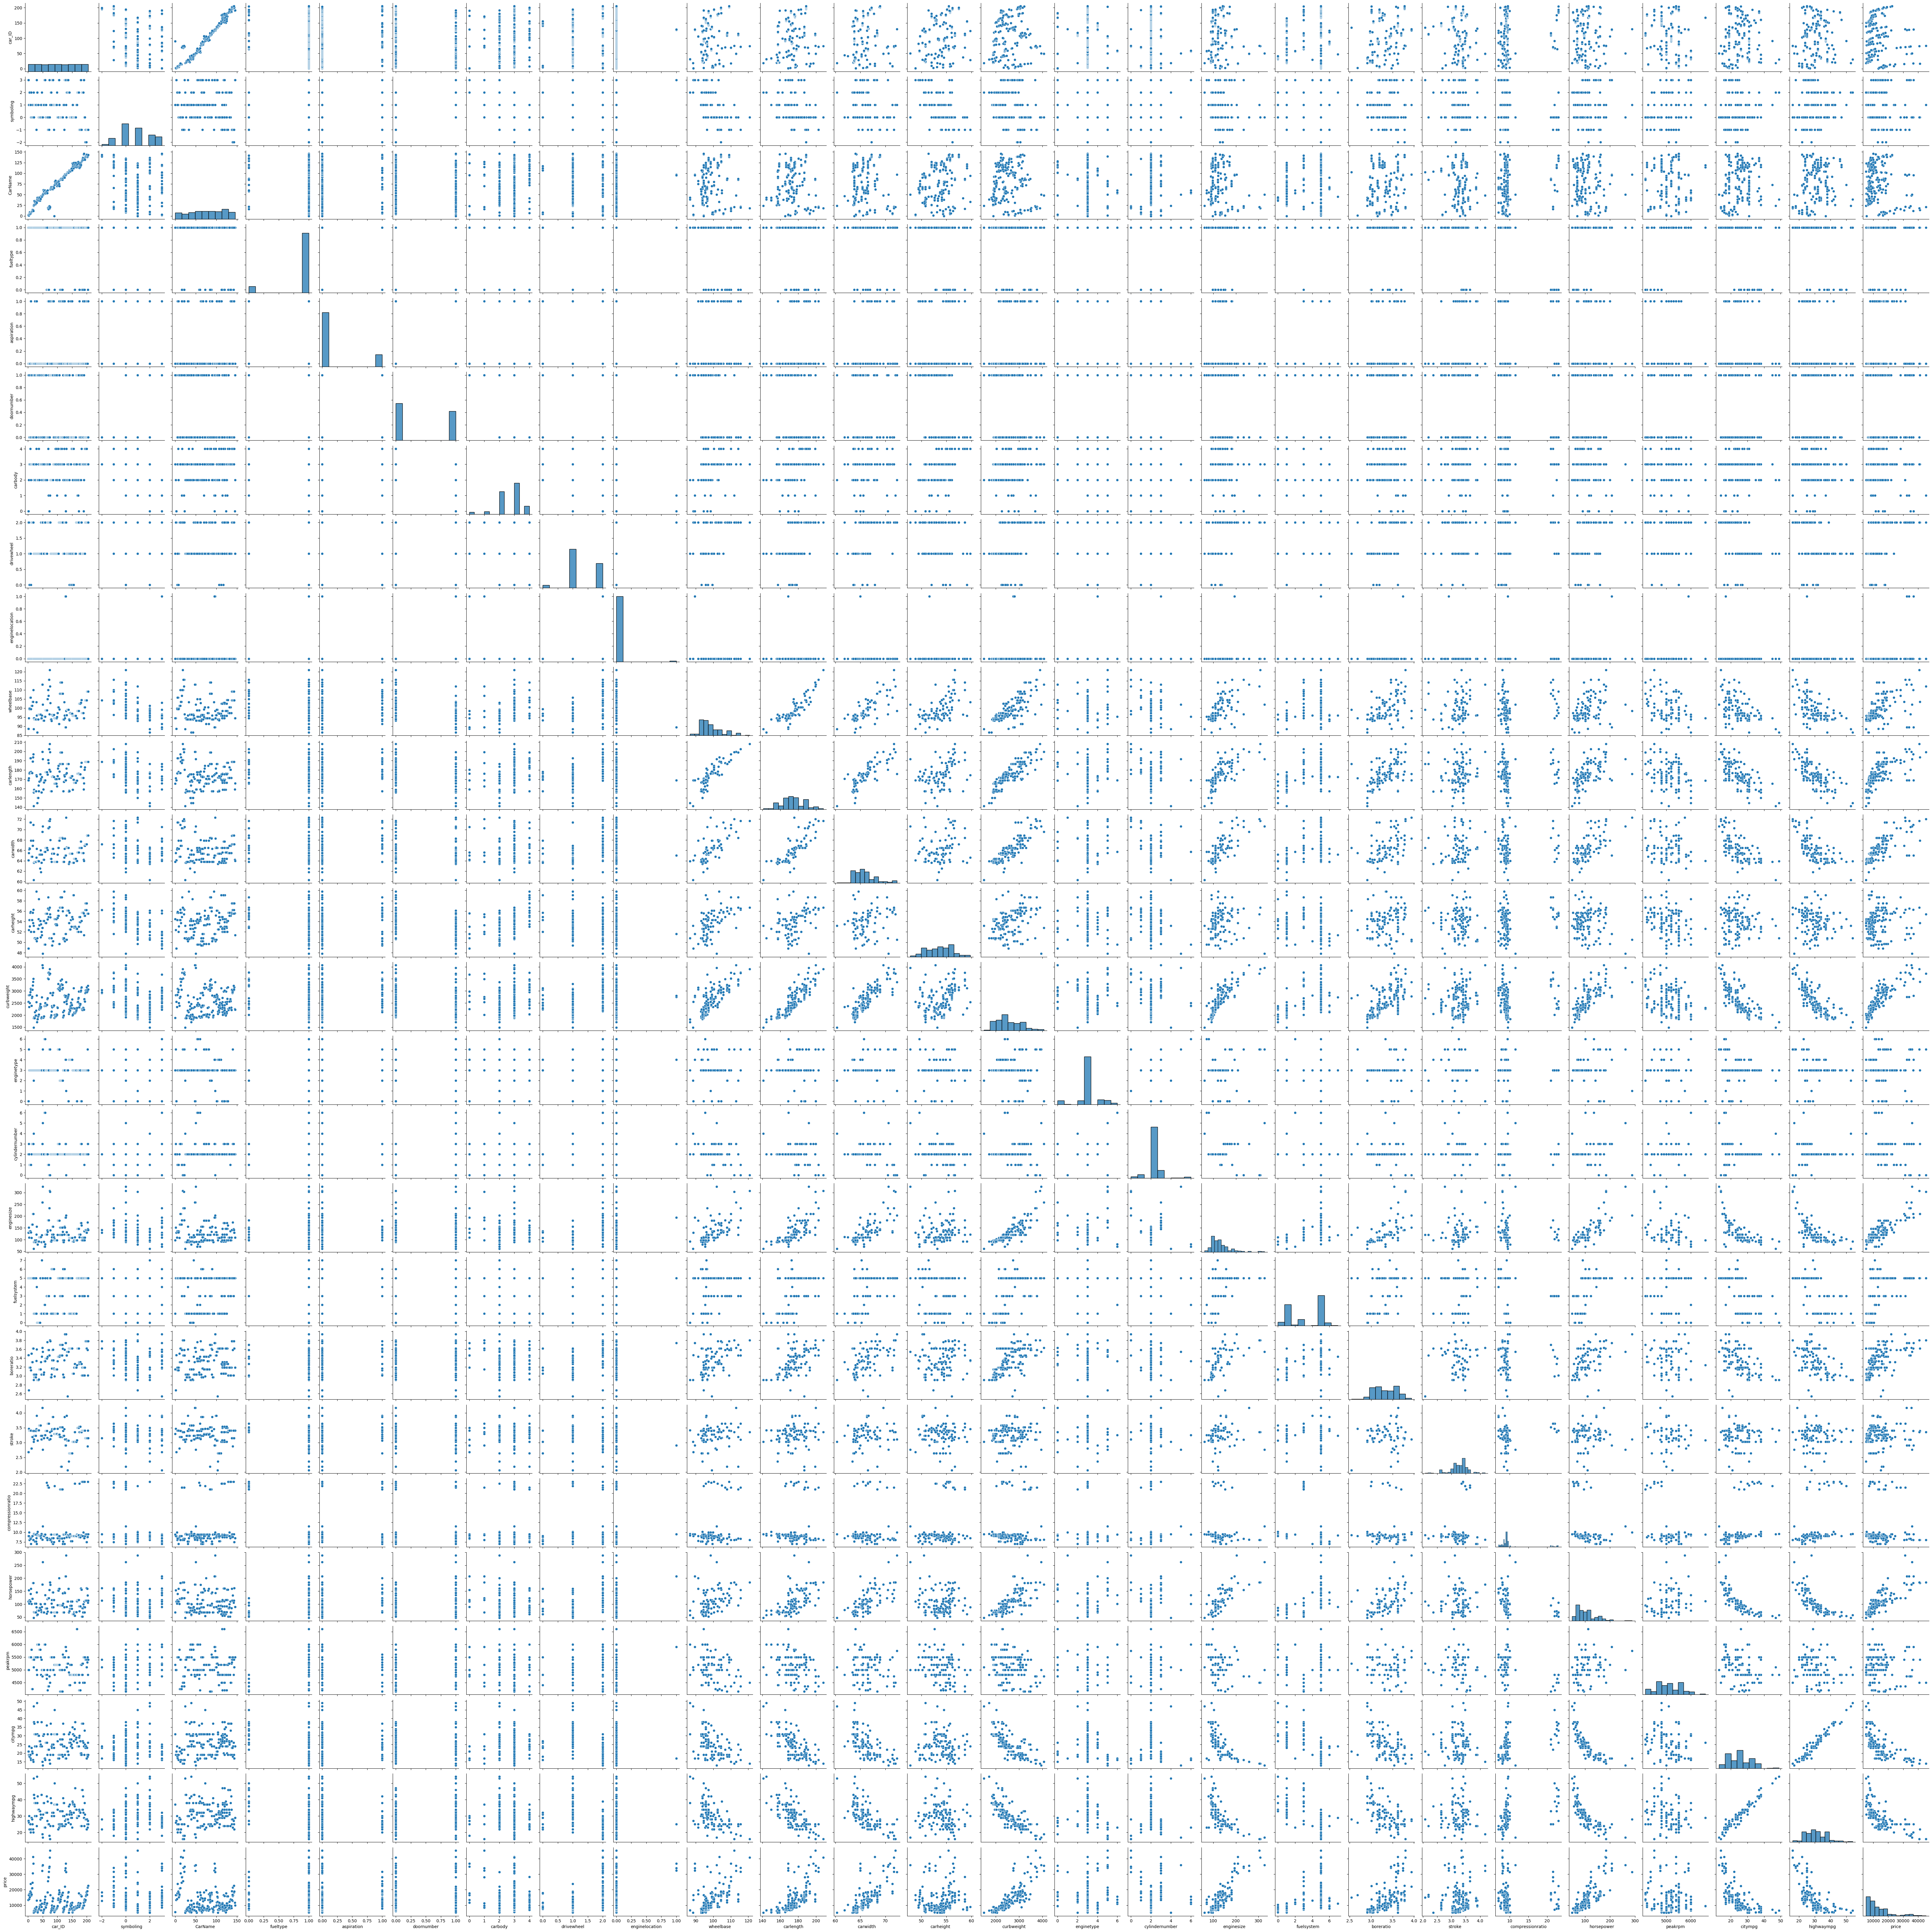

In [13]:
 import seaborn as sns #seaborn
sns.pairplot(df)


In [14]:
x= df.drop("price", axis=1)

In [15]:
 y = df['price']

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split( x, y,test_size= 0.3,random_state= 42)


In [17]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(df.shape)


(143, 25)
(143,)
(62, 25)
(62,)
(205, 26)


In [18]:
#Import Libraries file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split #Train Test Split
from sklearn.naive_bayes import GaussianNB # Naive Bayes Classifier
from sklearn import preprocessing # Label Encoder
from sklearn.neighbors import KNeighborsClassifier # KNN Classsifiers

In [23]:
#Train Test split
x =df[['car_ID','symboling','wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','CarName','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','cylindernumber','fuelsystem','enginetype']]
y = df['price']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=48)
x_train.shape

(143, 25)

In [24]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()


In [25]:
model.fit(x_train,y_train)

LinearRegression()

In [26]:
 predictions=model.predict(x_test)

Text(0, 0.5, 'predicted values')

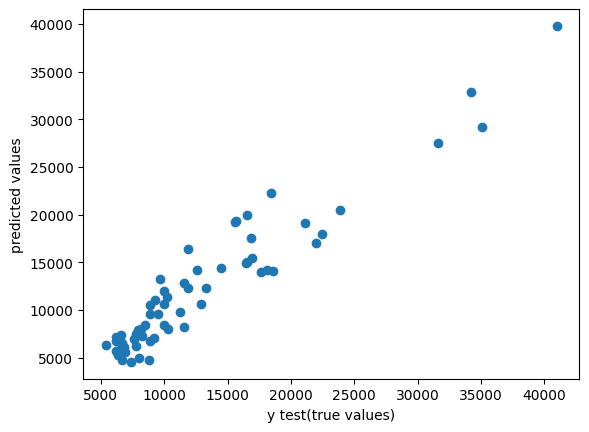

In [27]:
 plt.scatter(y_test,predictions)
plt.xlabel('y test(true values)')
plt.ylabel('predicted values')

In [28]:
 model.score(x_test,y_test)

0.8984406528407294

In [29]:
 print("ACCURACY IS:",model.score(x_test,y_test)*100)

ACCURACY IS: 89.84406528407294
